In [1]:
import time
import datetime as dt
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

sns.set(style='darkgrid', palette='deep')

Using TensorFlow backend.


## Challenge

Now take your Keras skills and go build another neural network. Pick your data set, but it should be one of abstract types, possibly even nonnumeric, and use Keras to make five implementations of your network. Compare them both in computational complexity as well as in accuracy and given that tradeoff decide which one you like best.

Your dataset should be sufficiently large for a neural network to perform well (samples should really be in the thousands here) and try to pick something that takes advantage of neural networks’ ability to have both feature extraction and supervised capabilities, so don’t pick something with an easy to consume list of features already generated for you (though neural networks can still be useful in those contexts).

Note that if you want to use an unprocessed image dataset, scikit-image is a useful package for converting to importable numerics.

In [2]:
# dataset: human activity recognition with smartphones
# source: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/home

train = pd.read_csv(
    '../06_06_tensorflow_keras/human-activity-recognition-with-smartphones/train.csv'
)
test = pd.read_csv(
    '../06_06_tensorflow_keras/human-activity-recognition-with-smartphones/test.csv'
)

In [3]:
print(train.shape)
print(train.info())
train.head(2)

(7352, 563)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [4]:
print(test.shape)
print(test.info())
test.head(2)

(2947, 563)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING


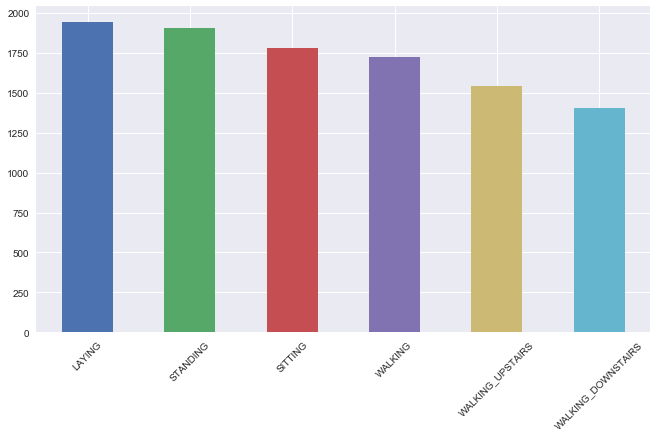

In [6]:
df = pd.concat([train, test], axis=0)
plt.figure(figsize=(11,6))
df.Activity.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import umap

df_data = df.loc[:, ~df.columns.isin(['Activity'])]
df_target = df.Activity

df_data_std = StandardScaler().fit_transform(df_data)

df_data_pca = PCA().fit_transform(df_data_std)

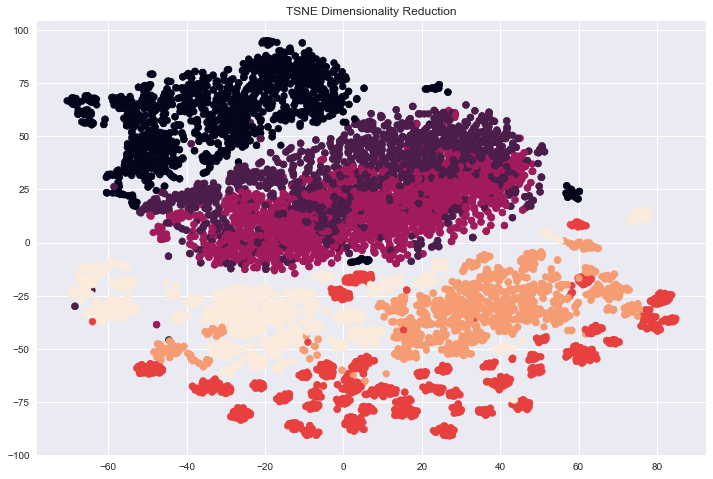

In [12]:
df_data_tsne = TSNE().fit_transform(df_data_pca)

plt.figure(figsize=(12,8))
plt.scatter(df_data_tsne[:, 0],
            df_data_tsne[:, 1],
            c=pd.Categorical(df_target).codes)
plt.title('TSNE Visualization')

plt.show()

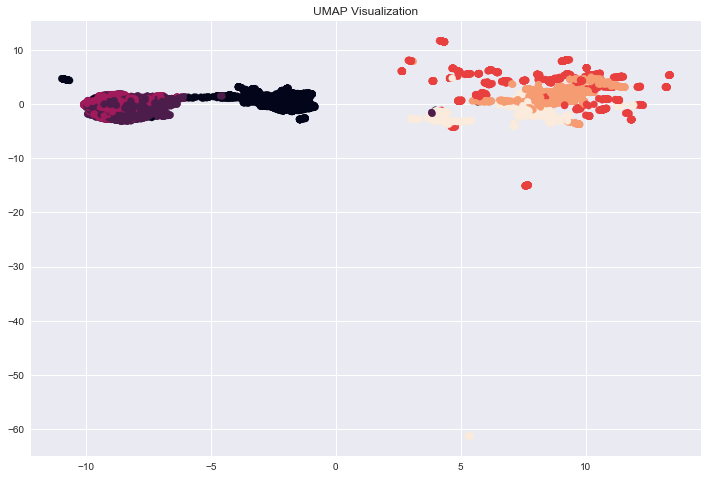

In [16]:
df_data_umap = umap.UMAP().fit_transform(df_data_std)

plt.figure(figsize=(12,8))
plt.scatter(df_data_umap[:, 0],
            df_data_umap[:, 1],
            c=pd.Categorical(df_target).codes)
plt.title('UMAP Visualization')
plt.show()

In [17]:
# set train/test data and target
X_train = train.loc[:, ~train.columns.isin(['Activity'])]
y_train = pd.get_dummies(train.Activity)

X_test = test.loc[:, ~test.columns.isin(['Activity'])]
y_test = pd.get_dummies(test.Activity)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7352, 562) (2947, 562)
(7352, 6) (2947, 6)


In [18]:
# 1. base model (same specs as example lesson)
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(562,)))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(6, activation='softmax'))


model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 1s 145us/step - loss: 0.9391 - acc: 0.6038 - val_loss: 0.4861 - val_acc: 0.8025
Epoch 2/10
7352/7352 [==============================] - 0s 29us/step - loss: 0.4445 - acc: 0.8142 - val_loss: 0.4586 - val_acc: 0.8442
Epoch 3/10
7352/7352 [==============================] - 0s 26us/step - loss: 0.3216 - acc: 0.8614 - val_loss: 0.3218 - val_acc: 0.8809
Epoch 4/10
7352/7352 [==============================] - 0s 27us/step - loss: 0.2432 - acc: 0.8979 - val_loss: 0.2222 - val_acc: 0.9223
Epoch 5/10
7352/7352 [==============================] - 0s 26us/step - loss: 0.2106 - acc: 0.9127 - val_loss: 0.2549 - val_acc: 0.9087
Epoch 6/10
7352/7352 [==============================] - 0s 24us/step - loss: 0.1851 - acc: 0.9226 - val_loss: 0.2814 - val_acc: 0.8982
Epoch 7/10
7352/7352 [==============================] - 0s 28us/step - loss: 0.1569 - acc: 0.9348 - val_loss: 0.1817 - val_acc: 0.9382
Epoch 

In [25]:
# 2 Tune batch size, epochs using function to build model from grid params
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_mlp(optimizer='rmsprop', loss='categorical_crossentropy'):
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(562,)))
    model.add(Dropout(0.1))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(6, activation='softmax'))


    model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
    )
    
    return model

In [26]:
neural_net = KerasClassifier(build_fn=create_mlp, verbose=0)

optimizer = [keras.optimizers.RMSprop()]
loss = ['categorical_crossentropy']
batch_size = [64, 128, 256]
epochs = [10, 20, 30]

params = dict(optimizer=optimizer, loss=loss, batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=neural_net, param_grid=params)

grid_results = grid.fit(X_train, y_train)

print('params: {}'.format(grid_results.best_params_))
print('score: {}'.format(grid_results.best_score_))
print('gridsearch runtime: {}'.format(time.time() - start_time))

params: {'batch_size': 64, 'epochs': 30, 'loss': 'categorical_crossentropy', 'optimizer': <keras.optimizers.RMSprop object at 0x10b9ea3c8>}
score: 0.9145810663967644
gridsearch runtime: 102.54173421859741


In [27]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    verbose=1,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 0s 45us/step - loss: 0.1237 - acc: 0.9502 - val_loss: 0.1607 - val_acc: 0.9389
Epoch 2/30
7352/7352 [==============================] - 0s 42us/step - loss: 0.1075 - acc: 0.9570 - val_loss: 0.1590 - val_acc: 0.9410
Epoch 3/30
7352/7352 [==============================] - 0s 41us/step - loss: 0.1029 - acc: 0.9570 - val_loss: 0.1762 - val_acc: 0.9403
Epoch 4/30
7352/7352 [==============================] - 0s 45us/step - loss: 0.0960 - acc: 0.9619 - val_loss: 0.1796 - val_acc: 0.9396
Epoch 5/30
7352/7352 [==============================] - 0s 42us/step - loss: 0.0863 - acc: 0.9668 - val_loss: 0.1782 - val_acc: 0.9355
Epoch 6/30
7352/7352 [==============================] - 0s 44us/step - loss: 0.0844 - acc: 0.9663 - val_loss: 0.2935 - val_acc: 0.9070
Epoch 7/30
7352/7352 [==============================] - 0s 42us/step - loss: 0.0808 - acc: 0.9668 - val_loss: 0.1770 - val_acc: 0.9420
Epoch 8

In [28]:
# 3 Tune optimizer, loss function
optimizer = [keras.optimizers.RMSprop(),
             keras.optimizers.Adadelta(),
             keras.optimizers.SGD()]
loss = [keras.losses.categorical_crossentropy(),
        keras.losses.mean_squared_error(),
        keras.losses.poisson()]
batch_size = [64]
epochs = [30]

params = dict(optimizer=optimizer, loss=loss, batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=neural_net, param_grid=params)

start_time = time.time()
grid_results = grid.fit(X_train, y_train)

print('params: {}'.format(grid_results.best_params_))
print('score: {}'.format(grid_results.best_score_))
print('gridsearch runtime: {}'.format(time.time() - start_time))

params: {'batch_size': 64, 'epochs': 30, 'loss': <function categorical_crossentropy at 0x1a2cb2a7b8>, 'optimizer': <keras.optimizers.Adadelta object at 0x1a3f218e80>}
score: 0.9198857452943353
gridsearch runtime: 233.1418731212616


In [32]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy']
)
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    verbose=0,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

test loss: 0.3394714637950141
test accuracy: 0.9436715303698676


In [37]:
# 4 build model with more layers
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(562,)))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy']
)

model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    verbose=0,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

test loss: 0.2304595933882931
test accuracy: 0.9402782490668476


In [38]:
# 5 Tune optimizers again
optimizer = [keras.optimizers.Adam(),
             keras.optimizers.Adadelta(),
             keras.optimizers.Adagrad(),
             keras.optimizers.Adamax(),
             keras.optimizers.Nadam()]
loss = [keras.losses.categorical_crossentropy]
batch_size = [64]
epochs = [30]

params = dict(optimizer=optimizer, loss=loss, batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=neural_net, param_grid=params)

start_time = time.time()
grid_results = grid.fit(X_train, y_train)

print('params: {}'.format(grid_results.best_params_))
print('score: {}'.format(grid_results.best_score_))
print('gridsearch runtime: {}'.format(time.time() - start_time))

params: {'batch_size': 64, 'epochs': 30, 'loss': <function categorical_crossentropy at 0x1a2cb2a7b8>, 'optimizer': <keras.optimizers.Adam object at 0x1a667577f0>}
score: 0.9186615886590297
gridsearch runtime: 184.82654309272766


In [41]:
# learning rate
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    verbose=0,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

test loss: 0.2427290040790207
test accuracy: 0.9443501866304717


In [42]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(0.005),
    metrics=['accuracy']
)
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    verbose=0,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

test loss: 0.25274947883718407
test accuracy: 0.9263657957244655


In [45]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(lr=0.0005),
    metrics=['accuracy']
)
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    verbose=0,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

test loss: 0.6683138334499273
test accuracy: 0.6454021038344079
